In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,make_blobs
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.colors as mcol
import os

In [ ]:
def plot_data(ax,X,y,is_train=True):
  X0=X[:,0];X1=X[:,1]
  colors=['red','blue']
  if is_train:
    markers=['x','*']
  else:
    markers=['o','s']
  for x0,x1,cls in zip(X0,X1,y):
    color=colors[int(cls)-1]
    marker=markers[int(cls)-1]
    ax.scatter(x0,x1,marker=marker,color=color)
  ax.set_ylim(-2.75,2.75)     

In [ ]:
print(xx.ravel().shape)

(210000,)


In [ ]:
grid=np.c_[xx.ravel(),yy.ravel()]
print(grid.shape)

(210000, 2)


In [ ]:
def plot_predictions(ax,xx,yy,transformer,model):
  grid=np.c_[xx.ravel(),yy.ravel()]
  grid2=transformer.transform(grid)[:,1:]
  Z=model.predict(grid2).reshape(xx.shape)
  ax.pcolormesh(xx,yy,Z,cmap=plt.cm.coolwarm,alpha=0.1)

In [ ]:
def make_data(ntrain,ntest):
  n=ntrain+ntest
  X,y=make_classification(n_samples=n,n_features=2,n_redundant=0,
                          n_classes=2,n_clusters_per_class=2,
                          class_sep=0.1,random_state=1)
  X0,y0=make_blobs(n_samples=[n,n],n_features=2,
                   cluster_std=2,random_state=1)
  
  Xtrain=X[:ntrain,:];ytrain=y[:ntrain]
  Xtest=X[ntrain:,:];ytest=y[ntrain:]
  xmin=np.min(X[:,0]);xmax=np.max(X[:,0]);
  ymin=np.min(X[:,1]);ymax=np.max(X[:,1]);
  xx,yy=np.meshgrid(np.linspace(xmin,xmax,n),np.linspace(ymin,ymax,200))
  
  return Xtrain,ytrain,Xtest,ytest,xx,yy
  

In [ ]:
ntrain=50;ntest=1000;
Xtrain,ytrain,Xtest,ytest,xx,yy=make_data(ntrain,ntest)

In [ ]:
print(Xtrain.shape)
print(ytrain.shape)

(50, 2)
(50,)


In [ ]:
print(Xtrain[:3])

[[-0.14680012  0.92409992]
 [ 0.00328203 -0.02134139]
 [ 0.30779341 -0.50742032]]


In [ ]:
print(ytrain)

[0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
 0 1 0 1 1 0 0 1 0 0 0 1 1]


In [ ]:
print(xx.shape)
print(yy.shape)

(200, 1050)
(200, 1050)


In [ ]:
#Try different strength regulaizers
degree=4
C_list=np.logspace(0,5,7)
print(C_list)

[1.00000000e+00 6.81292069e+00 4.64158883e+01 3.16227766e+02
 2.15443469e+03 1.46779927e+04 1.00000000e+05]


In [ ]:
transformer=PolynomialFeatures(degree)
print(transformer)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')


In [ ]:
print(model.coef_)

[[  -6.36257349    0.66948193  -12.70390961   30.19909489    3.75623501
   -11.30448977  -21.62930082  239.87455042   33.84003563  145.83231049
    54.98206514 -132.0854263   117.50070659   22.20526729]]


In [ ]:
ytrain_pred=model.predict(XXtrain)
print(ytrain_pred)

[0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0
 0 1 0 0 1 0 0 1 0 0 0 1 1]


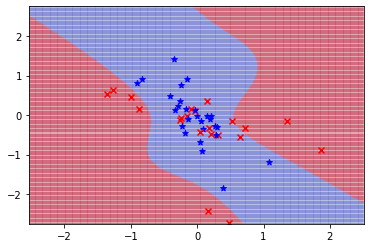

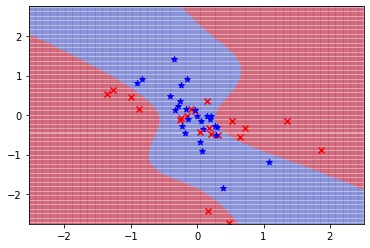

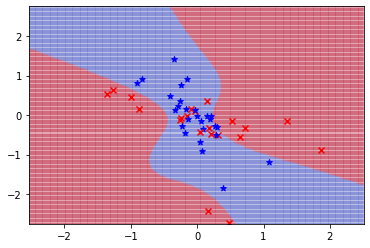

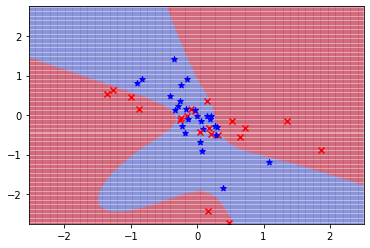

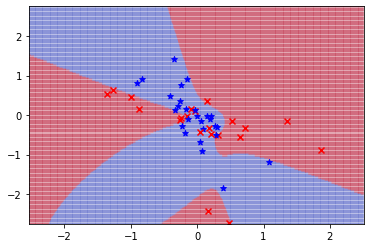

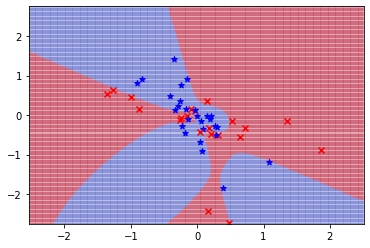

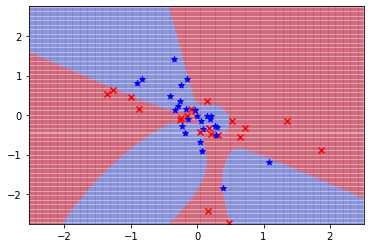

In [ ]:
plot_list=C_list
err_train_list=[]
err_test_list=[]
w_list=[]
for i,C in enumerate(C_list):
  transformer=PolynomialFeatures(degree)
  name='Reg{:d}-Degree{}'.format(int(C),degree)
  XXtrain=transformer.fit_transform(Xtrain)[:,1:]  #skip the first columns of 1s
  
  model=LogisticRegression(C=C,max_iter=1000)
  model=model.fit(XXtrain,ytrain)
  w=model.coef_[0]
  w_list.append(w)
  ytrain_pred=model.predict(XXtrain)
  nerrors_train=np.sum(ytrain_pred!=ytrain)
  err_train_list.append(nerrors_train/ntrain)

  XXtest=transformer.fit_transform(Xtest)[:,1:]
  ytest_pred=model.predict(XXtest)
  nerrors_test=np.sum(ytest_pred!=ytest)
  err_test_list.append(nerrors_test/ntest)

  if C in plot_list:
    fig,ax=plt.subplots()
    plot_predictions(ax,xx,yy,transformer,model)
    plot_data(ax,Xtrain,ytrain,is_train=True)
    plt.draw()


In [ ]:
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def sigmoid(v):
  return 1/(1+np.exp(-v))

In [ ]:
def make_lin_sig(w):
  def lin_sig(x):
    return sigmoid(w.dot(x))

  return lin_sig  

In [ ]:
def num_to_string(num):
  if int(num)==num:
    return str(int(num))
  else:
    return str(num)  

In [ ]:
X1,X2=np.meshgrid(np.linspace(-10,10,20),
                  np.linspace(-10,10,20))

In [ ]:
print(X1.shape)

(20, 20)


In [ ]:
def plot_linsig(ax,w):
  Y=np.zeros(X1.shape)

  lin_sig=make_lin_sig(np.array(w))

  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      Y[i,j]=lin_sig(np.array([X1[i,j],X2[i,j]]))

  ax.plot_surface(X1,X2,Y,cmap='jet',vmin=0,vmax=3,rstride=1,
                  cstride=1,linewidth=0)
  ax.set_zticks([0.0,0.5,1.0]) 
  ax.set_xticks([-10,5,0,5,10])
  ax.set_yticks([-10,5,0,5,10])
  ax.set_title('W=({0},{1})'.format(num_to_string(w[0]),num_to_string(w[1])))

  return ax


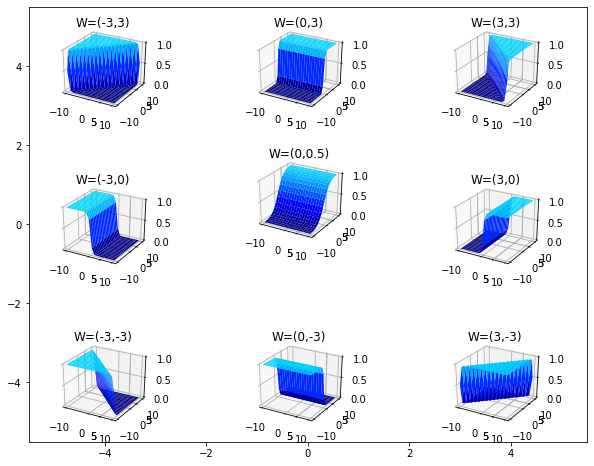

In [ ]:
fig,ax=plt.subplots(figsize=(10,8))

lims=[-5.5,5.5]
ax.set_ylim(*lims)
ax.set_xlim(*lims)

half_width=0.075


def det_position(wi):
    # Determine what proportion of the axis limits w is.
    return (wi - lims[0])/(lims[1]-lims[0])

for w_y in [-3.0,0.0,3.0]:
  for w_x in [-3.0,0.0,3.0]:
    if w_x==w_y==0:
      w=[w_x,0.5]
    else:
      w=[w_x,w_y]

    position=[det_position(w[0]),det_position(w[1])]

    left,bottom,width,height=[position[0]-half_width,position[1]-half_width,
                                       2*half_width,2*half_width]
   
    curr_ax=fig.add_axes([left,bottom,width,height],projection='3d') 
    curr_ax=plot_linsig(curr_ax,w)

plt.show()